# Breast Cancer Detection Using Logistic Regression

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split



%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

ModuleNotFoundError: No module named 'pyarrow'

## Downloading the Data

In [4]:
medical_df = pd.read_csv("data.csv")

In [5]:
medical_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


This dataset contains 570 rows and 33 columns. We have no categorical columns. Our objective is to create a model to predict the value in the diagnosis column, which could either take the values "B" or "M".

In [6]:
medical_df.info()

print("\n\nMissing Values in every column: ")
medical_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

The "Unnamed: 32" column in your dataset likely represents an extra column that was included during the data import process, possibly from an extra comma or similar artifact in the CSV or data file. 

In [7]:
medical_df = medical_df.drop(columns=['Unnamed: 32'])

print("\n\nMissing Values in every column: ")
medical_df.isnull().sum()



Missing Values in every column: 


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There are no null values in any of the columns now.

## Exploratory Data Analysis and Visualization

In [8]:
px.histogram(medical_df, x='radius_mean', title='Distribution of Mean Radius Sizes', color='diagnosis')

Smaller radius sizes seems to indicate benign tumors, which aee non-cancerous and geenerally less aggressive. Conversely, latger radius sizes seem to correspond to malignant tumors, which are cancerous and have a higher potential for aggression and spread.

In [9]:
px.histogram(medical_df, x='texture_mean', title='Distribution of Mean Texture', color='diagnosis')

If a histogram of texture_mean shows differences in distribution between M (malignant) and B (benign) groups, it might suggest that more irregular and complex textures are associated with malignant tumors. However, the relationship might not be as strong or as straightforward as with size-related measures. Higher texture_mean values could suggest malignancy due to the disorganized nature of cancerous tissue, while lower values might correlate with the more uniform texture of benign tissues.

In [10]:
px.histogram(medical_df, x='concavity_mean', title='Distribution of Mean Concavity', color='diagnosis')

Tumors with have concavity seems to have a higher chance of being malignant. This is because more aggressive tumors tend to have more irregular shapes and deeper concavities. 

In [11]:
px.histogram(medical_df, x='compactness_mean', title='Distribution of Mean Compactness', color='diagnosis')

Higher values are observed among malignant tumors, which could suggest that denser, more compact tumors are more likely to be cancerous. Conversely, lower compactness might be more typical of benign tumors.

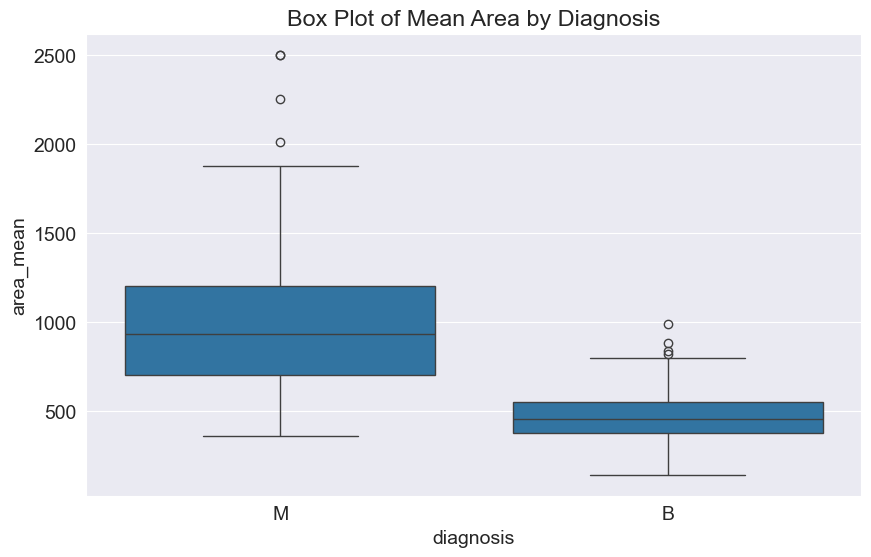

In [12]:
sns.boxplot(x='diagnosis', y='area_mean', data=medical_df)
plt.title('Box Plot of Mean Area by Diagnosis')
plt.show()

Malignant tumors seem to have a higher mean area compared to benign tumors, as aggressive tumors tend to be larger.

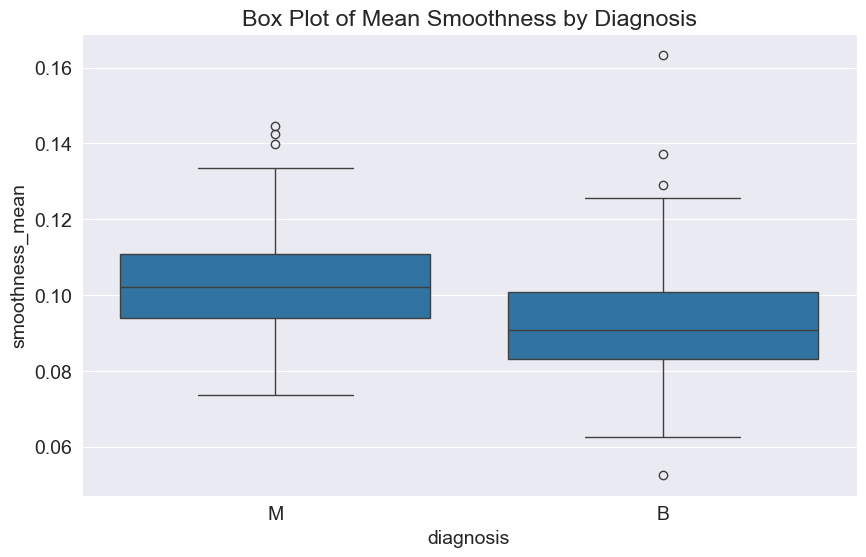

In [13]:
sns.boxplot(x='diagnosis', y='smoothness_mean', data=medical_df)
plt.title('Box Plot of Mean Smoothness by Diagnosis')
plt.show()

Malignant tumors (M) tend to exhibit a higher mean smoothness compared to benign tumors (B). This observation can be linked to the nature of malignant tumors, which often have more irregular and compact cellular structures that might result in a smoother appearance at a microscopic level. 

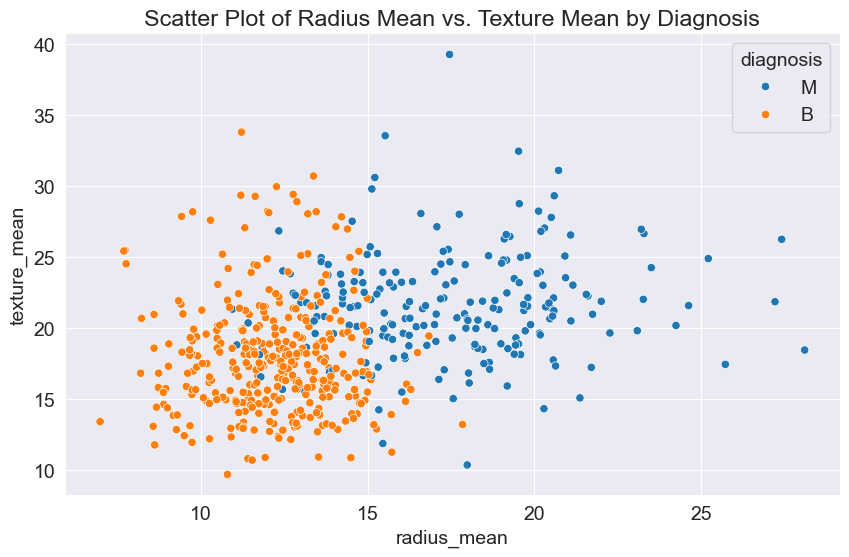

In [14]:
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=medical_df)
plt.title('Scatter Plot of Radius Mean vs. Texture Mean by Diagnosis')
plt.show()

The scatter plot reveals a discernible trend where as radius_mean increases, texture_mean tends to increase as well, suggesting a positive correlation between the size and texture of the tumors. Notably, benign (B) tumors predominantly cluster in regions characterized by lower values of both radius_mean and texture_mean. In contrast, malignant (M) tumors generally occupy the higher range of both dimensions. A critical observation is the presence of a boundary-like region where the concentration of benign points diminishes and malignant points become prevalent.

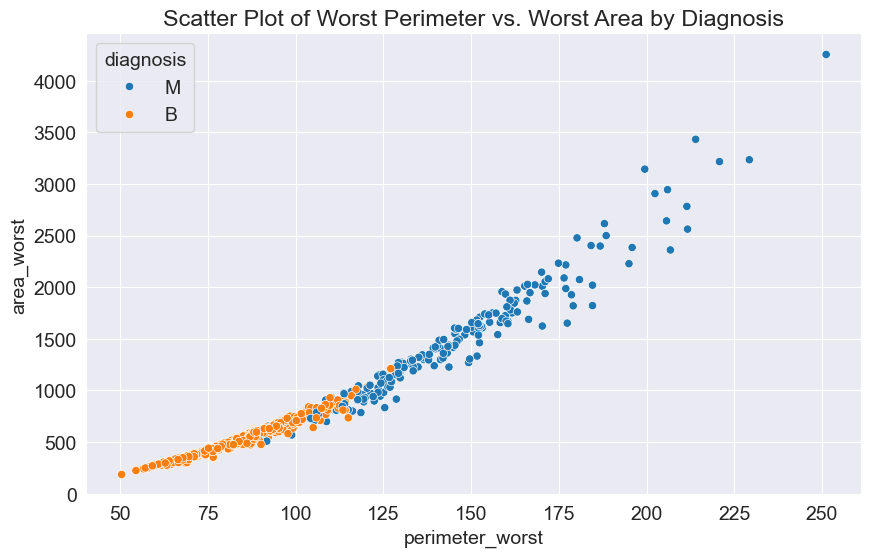

In [15]:
sns.scatterplot(x='perimeter_worst', y='area_worst', hue='diagnosis', data=medical_df)
plt.title('Scatter Plot of Worst Perimeter vs. Worst Area by Diagnosis')
plt.show()

A strong linear correlation is observed, possibly suggesting that larger perimeters and areas are typically associated with malignancy, reflecting more aggressive tumor growth.

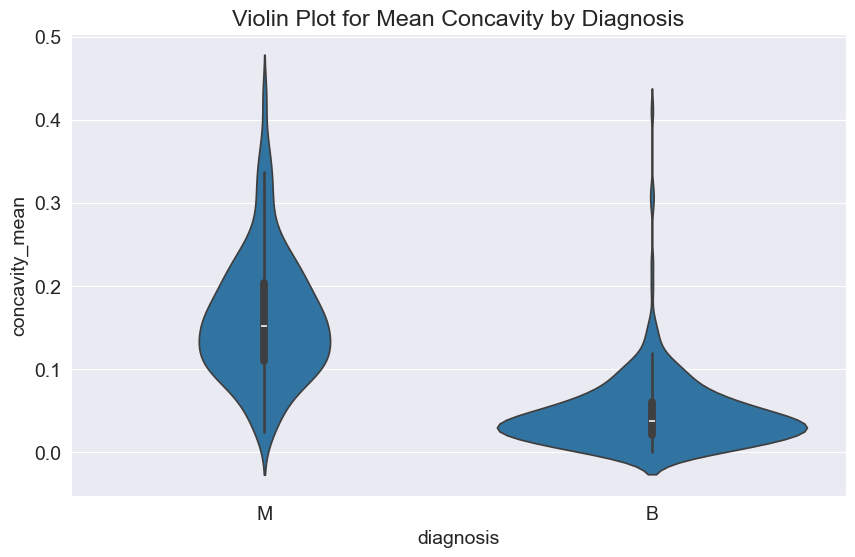

In [16]:
sns.violinplot(x='diagnosis', y='concavity_mean', data=medical_df)
plt.title('Violin Plot for Mean Concavity by Diagnosis')
plt.show()

The plot shows that higher concavity is more prevalent in malignant tumors, suggesting a more aggressive tumor nature.

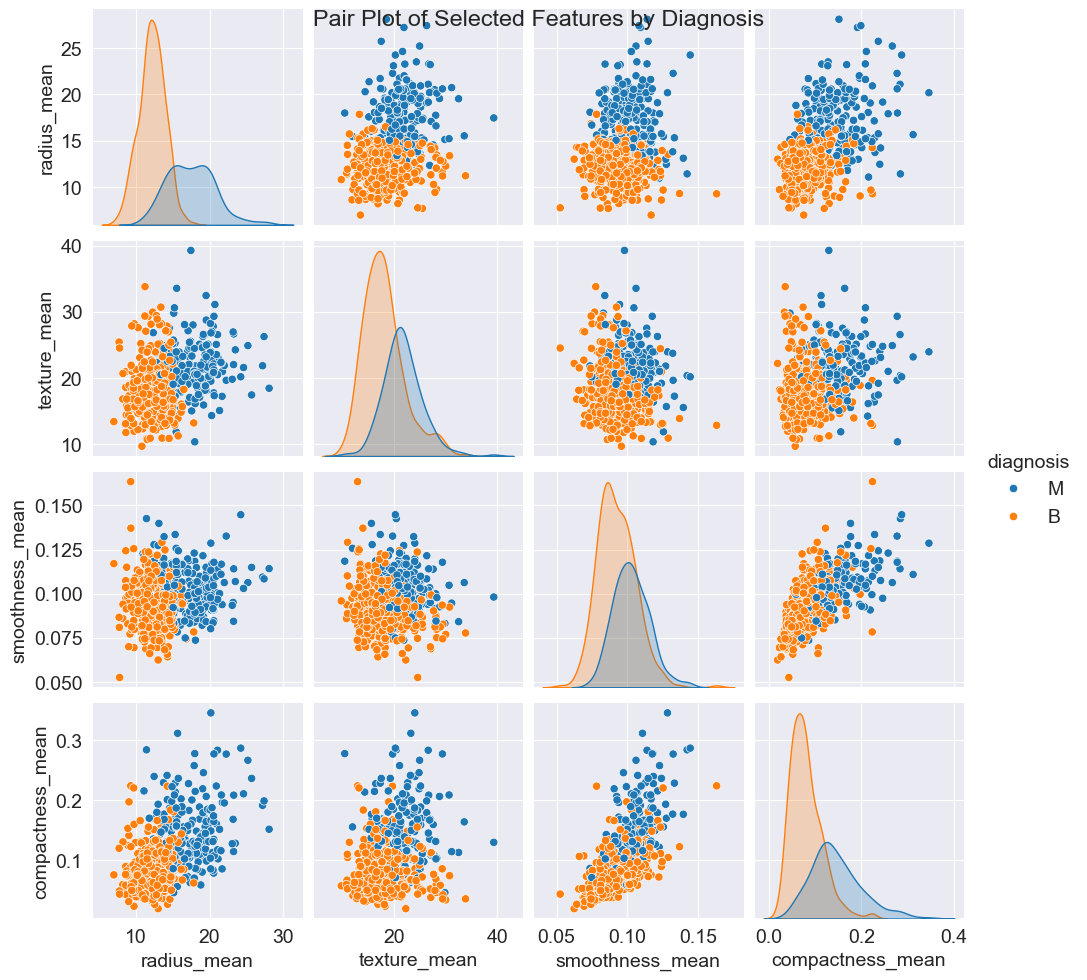

In [17]:
sns.pairplot(medical_df, vars=['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean'], hue='diagnosis')
plt.suptitle('Pair Plot of Selected Features by Diagnosis')
plt.show()

## Training, Validation and Test Sets

In [18]:
train_val_df, test_df = train_test_split(medical_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [19]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (341, 32)
val_df.shape : (114, 32)
test_df.shape : (114, 32)


## Identifying Input and Target Columns

In [20]:
medical_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Here, it is evident that the "id" column is not useful for training the model. So, in our training, validation and test sets, we ignore the "id" column.

In [35]:
input_cols = list(medical_df.columns)[2:]
input_cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [36]:
target_col = "diagnosis"

In [37]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [38]:
train_inputs

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
217,10.200,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.01071,0.1964,0.06315,...,11.48,24.47,75.40,403.7,0.09527,0.1397,0.19250,0.03571,0.2868,0.07809
283,16.240,18.77,108.80,805.1,0.10660,0.18020,0.19480,0.09052,0.1876,0.06684,...,18.55,25.09,126.90,1031.0,0.13650,0.4706,0.50260,0.17320,0.2770,0.10630
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.71190,0.26540,0.4601,0.11890
504,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,0.2378,0.09502,...,10.28,16.38,69.05,300.2,0.19020,0.3441,0.20990,0.10250,0.3038,0.12520
251,11.500,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,0.1834,0.05934,...,12.97,22.46,83.12,508.9,0.11830,0.1049,0.08105,0.06544,0.2740,0.06487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,14.710,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,0.2027,0.06758,...,17.87,30.70,115.70,985.5,0.13680,0.4290,0.35870,0.18340,0.3698,0.10940
492,18.010,20.56,118.40,1007.0,0.10010,0.12890,0.11700,0.07762,0.2116,0.06077,...,21.53,26.06,143.40,1426.0,0.13090,0.2327,0.25440,0.14890,0.3251,0.07625
418,12.700,12.17,80.88,495.0,0.08785,0.05794,0.02360,0.02402,0.1583,0.06275,...,13.65,16.92,88.12,566.9,0.13140,0.1607,0.09385,0.08224,0.2775,0.09464
385,14.600,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,0.1627,0.05416,...,15.79,31.71,102.20,758.2,0.13120,0.1581,0.26750,0.13590,0.2477,0.06836


In [39]:
train_targets

217    B
283    M
0      M
504    B
251    B
      ..
57     M
492    M
418    B
385    M
325    B
Name: diagnosis, Length: 341, dtype: object

## Scaling Numeric Features

In this section, we scale all the numeric features to a range between (0,1). Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss.

In [40]:
scaler = MinMaxScaler()

In [41]:
scaler.fit(medical_df[input_cols])

MinMaxScaler()

Now, we seperately scale the training, validation, and test sets using the transform method of scalar.

In [42]:
train_inputs[input_cols] = scaler.transform(train_inputs[input_cols])
val_inputs[input_cols] = scaler.transform(val_inputs[input_cols])
test_inputs[input_cols] = scaler.transform(test_inputs[input_cols])

Now, let us review if each of the numeric columns have been appropriately scaled.

In [43]:
train_inputs[input_cols].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,...,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,0.332268,0.318504,0.326451,0.211712,0.390940,0.254246,0.200232,0.234369,0.383871,0.269382,...,0.291555,0.358350,0.278217,0.167458,0.398758,0.215037,0.210895,0.386814,0.266614,0.187798
std,0.164389,0.141954,0.165191,0.146545,0.130450,0.165308,0.185427,0.189919,0.142330,0.156107,...,0.172374,0.159304,0.167639,0.142196,0.154633,0.152456,0.160643,0.227713,0.126462,0.118234
min,0.033603,0.000000,0.028540,0.011410,0.000000,0.000000,0.000000,0.000000,0.054040,0.000000,...,0.026610,0.000000,0.020320,0.009438,0.066565,0.006821,0.000000,0.000000,0.000000,0.000000
25%,0.220029,0.223537,0.213461,0.114146,0.299630,0.129471,0.061809,0.095626,0.282828,0.161542,...,0.179651,0.244136,0.165347,0.080785,0.282837,0.107508,0.086821,0.216357,0.189237,0.102781
50%,0.294335,0.308083,0.288093,0.167508,0.377088,0.205632,0.135286,0.161531,0.373232,0.246420,...,0.248310,0.351812,0.232880,0.120306,0.390477,0.173094,0.171805,0.338866,0.251528,0.161157
75%,0.410762,0.400744,0.407781,0.260912,0.471879,0.338998,0.285380,0.336581,0.457576,0.338037,...,0.361793,0.463486,0.358534,0.205417,0.494156,0.304945,0.300240,0.537801,0.317564,0.242818
max,0.967343,1.000000,0.988943,1.000000,1.000000,0.895712,1.000000,1.000000,0.850000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.972264,0.883478,0.767412,1.000000,1.000000,0.773711


## Saving Processed Data to Disk

In [53]:
pd.DataFrame(train_targets).to_parquet('train_targets.parquet', engine='fastparquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet', engine='fastparquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet', engine='fastparquet')

ImportError: Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.